In [294]:
import pandas as pd
import numpy as np
 
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [295]:
df = pd.read_csv('World_Billionaire_2024.csv')  
df_g =  pd.read_csv('World_Billionaire_2024.csv')  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RANK            2743 non-null   object
 1   COMPANY         2740 non-null   object
 2   EXECUTIVE NAME  2743 non-null   object
 3   NET WORTH       2743 non-null   object
 4   COUNTRY         2743 non-null   object
dtypes: object(5)
memory usage: 107.3+ KB


,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States


In [296]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df_g = df.drop(0).reset_index(drop=True)
df.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
1,2,Amazon,Jeff Bezos,$203.5 B,United States
2,3,LVMH,Bernard Arnault & family,$194.3 B,France
3,4,Facebook,Mark Zuckerberg,$175.9 B,United States
4,5,Oracle,Larry Ellison,$174.1 B,United States


In [297]:
df.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
1,2,Amazon,Jeff Bezos,$203.5 B,United States
2,3,LVMH,Bernard Arnault & family,$194.3 B,France
3,4,Facebook,Mark Zuckerberg,$175.9 B,United States
4,5,Oracle,Larry Ellison,$174.1 B,United States


In [298]:
df_g.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,2,Amazon,Jeff Bezos,$203.5 B,United States
1,3,LVMH,Bernard Arnault & family,$194.3 B,France
2,4,Facebook,Mark Zuckerberg,$175.9 B,United States
3,5,Oracle,Larry Ellison,$174.1 B,United States
4,6,Google,Larry Page,$145.8 B,United States


In [299]:
df['NET WORTH'] = df['NET WORTH'].str.replace(' B', '').str.replace('$', '').astype(float)


In [300]:
df.nunique()

0
RANK              2572
COMPANY            970
EXECUTIVE NAME    2742
NET WORTH          240
COUNTRY             78
dtype: int64

In [301]:
df["COMPANY"].dropna()

0                 Tesla, SpaceX
1                        Amazon
2                          LVMH
3                      Facebook
4                        Oracle
                 ...           
2737                  Machinery
2738                  Packaging
2739          Electric scooters
2740    Lithium-ion battery cap
2741            music, sneakers
Name: COMPANY, Length: 2739, dtype: object

In [302]:
le = LabelEncoder()
df["COMPANY"] = le.fit_transform(df["COMPANY"])
df["EXECUTIVE NAME"] = le.fit_transform(df["EXECUTIVE NAME"])
df["COUNTRY"] = le.fit_transform(df["COUNTRY"])

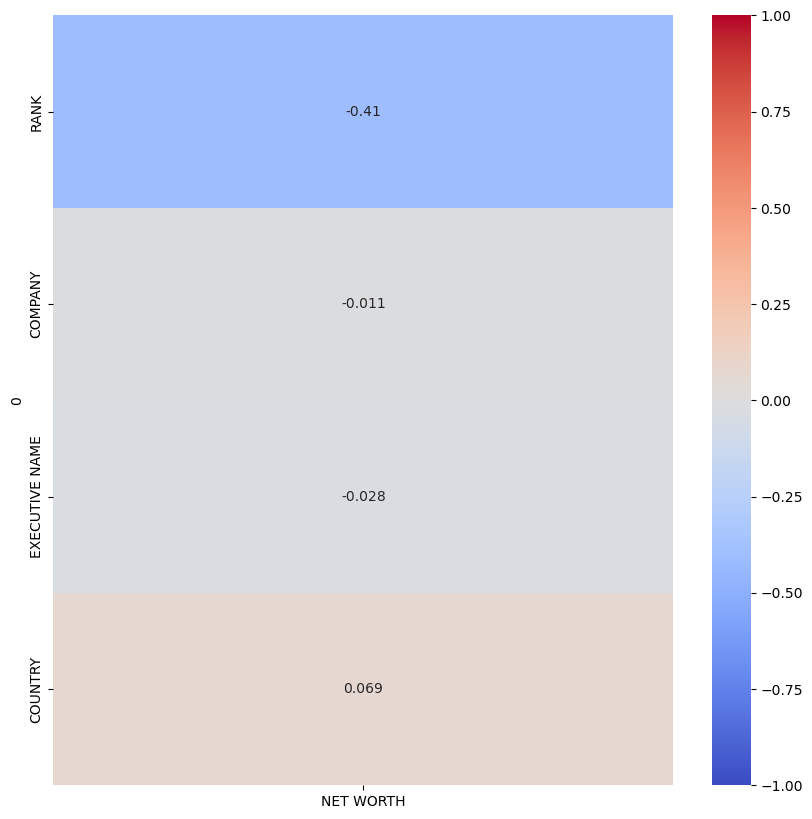

In [303]:
corr = df.corr()["NET WORTH"].drop("NET WORTH")
plt.figure(figsize=(10,10))
sns.heatmap(corr.to_frame(),annot=True, cmap="coolwarm", vmax= 1, vmin= -1)
plt.show()

In [304]:
y = df["NET WORTH"]
x = df.drop(columns=["NET WORTH"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [305]:
rf = RandomForestRegressor()
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.9984267868006024

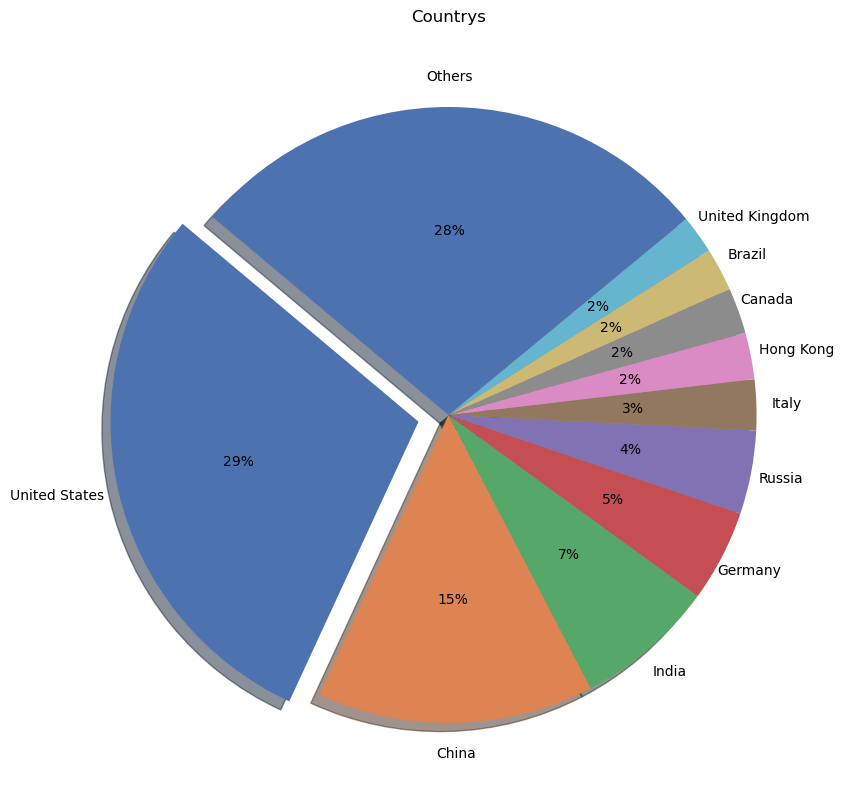

In [306]:
plt.figure(figsize=(10,10))
country = df_g['COUNTRY'].value_counts()
total = country.sum()
threshold = total * 0.02

country_combined = country[country > threshold]
country_combined['Others'] = country[country <= threshold].sum()

color = sns.color_palette("deep")
explode = [0.1 if i == country_combined.idxmax() else 0 for i in country_combined.index]

wedges, texts, autotexts = plt.pie(country_combined, labels=country_combined.index, colors=color, shadow = True,startangle = 140,
        explode=explode, autopct="%.0f%%",textprops={'rotation_mode': 'anchor', 'ha': 'center'}
)


for text in texts:
    if text.get_text() == 'United Kingdom':
      x, y = text.get_position()
      text.set_position((x + 0.1, y)) 
for text in texts:
    if text.get_text() == 'Hong Kong':
      x, y = text.get_position()
      text.set_position((x + 0.05, y))     

for text in texts:
    if text.get_text() == 'United States':
      x, y = text.get_position()
      text.set_position((x - 0.1, y))    
plt.title("Countrys")     
       

plt.show()

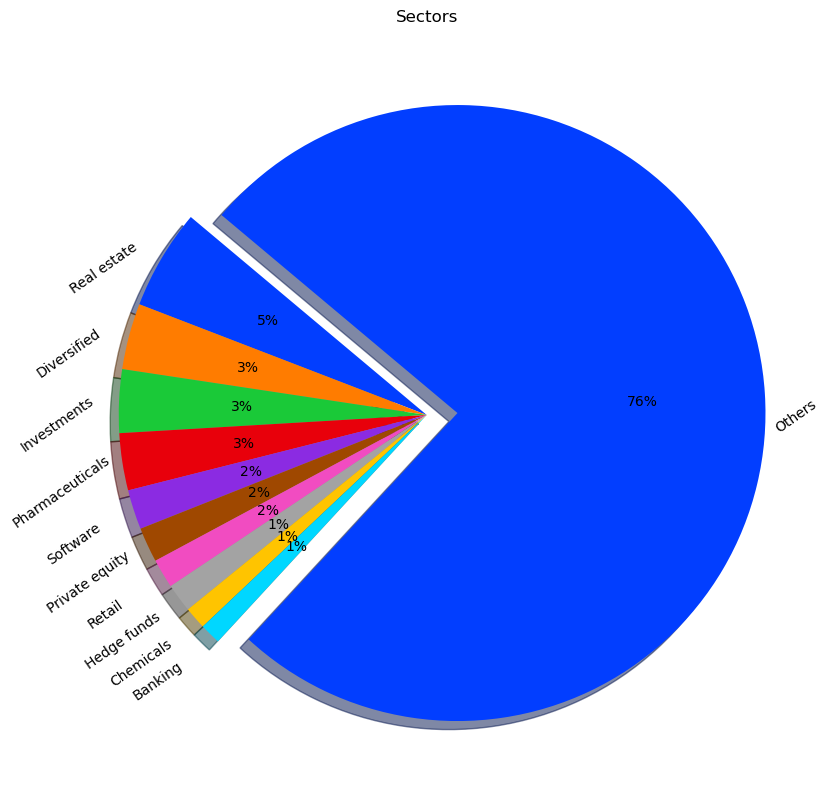

In [307]:
plt.figure(figsize=(20,10))
country = df_g['COMPANY'].value_counts()
total = country.sum()
threshold = total * 0.01

country_combined = country[country > threshold]
country_combined['Others'] = country[country <= threshold].sum()

color = sns.color_palette("bright", n_colors=len(country_combined))
explode = [0.1 if i == country_combined.idxmax() else 0 for i in country_combined.index]

wedges, texts, autotexts = plt.pie(country_combined, labels=country_combined.index, colors=color, shadow = True,startangle = 140,
        explode=explode, autopct="%.0f%%",textprops={'rotation_mode': 'anchor', 'ha': 'center'}
)

for text in texts:
    x, y = text.get_position()
    text.set_position((x - 0.1, y - 0.08))
    text.set_rotation(35)
for text in texts:
    if text.get_text() == "Others":
      x, y = text.get_position()
      text.set_position((x + 0.1, y))
       
plt.title("Sectors")

plt.show()

In [317]:
df_g['NET WORTH'] = df_g['NET WORTH'].str.replace(' B', '').str.replace('$', '').astype(float)

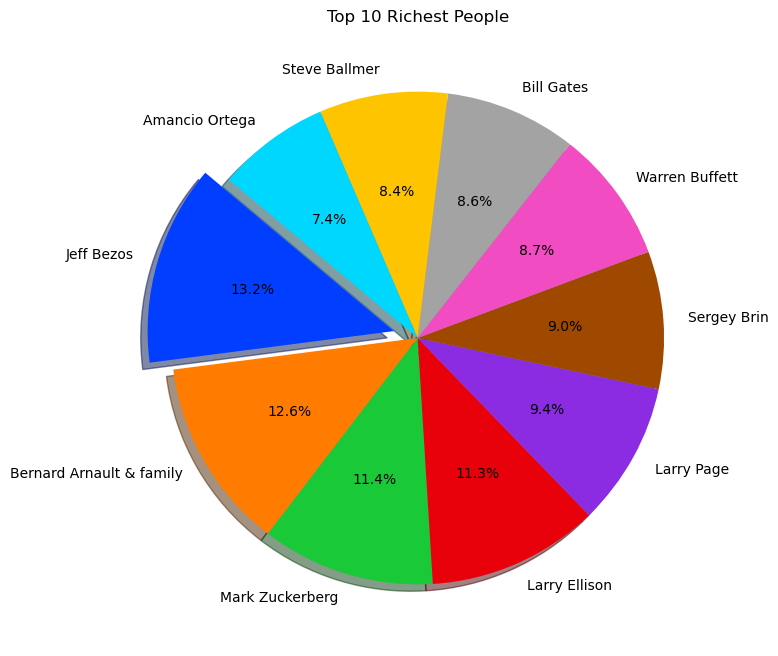

In [318]:
plt.figure(figsize=(8, 8))
head_10 = df_g.head(10)
color = sns.color_palette("bright", n_colors=len(head_10))
explode = [0.1 if df_g['NET WORTH'].iloc[i] == df_g['NET WORTH'].max() else 0 for i in range(len(head_10))]

plt.pie(head_10['NET WORTH'], labels=head_10['EXECUTIVE NAME'], autopct='%1.1f%%', explode = explode,startangle=140, colors = color, shadow=True)
plt.title('Top 10 Richest People')
plt.show()

In [319]:
df = df.dropna()

In [320]:
df.isna().sum()

0
RANK              0
COMPANY           0
EXECUTIVE NAME    0
NET WORTH         0
COUNTRY           0
dtype: int64

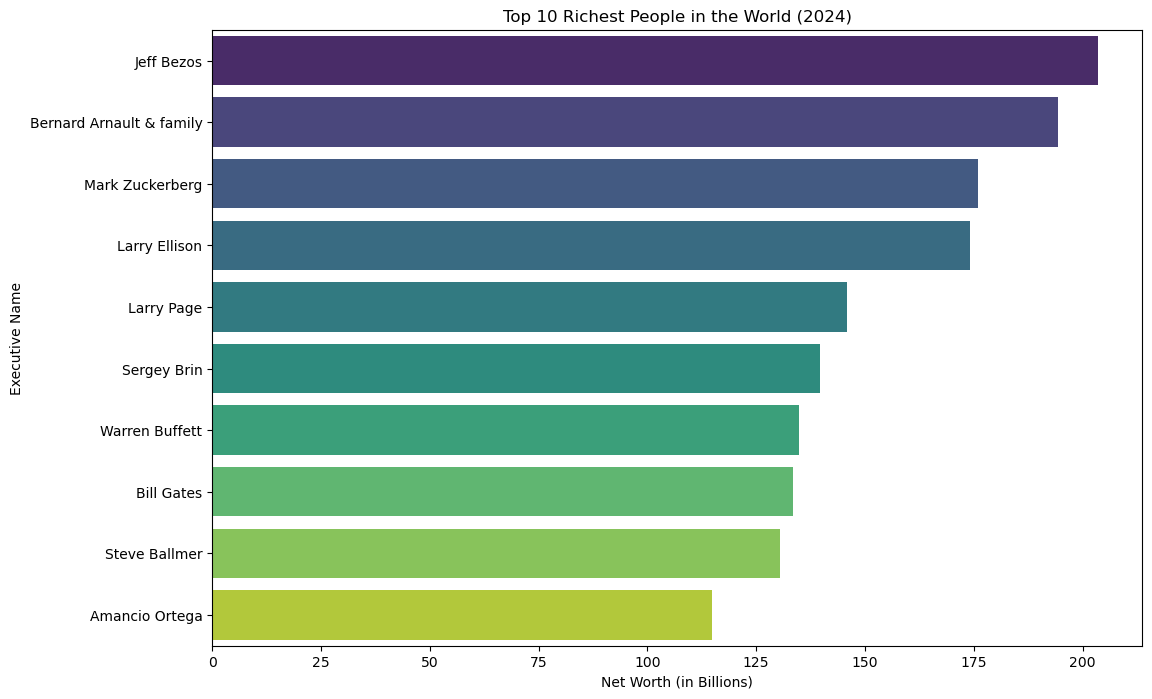

In [322]:
#10 самых богатых людей
top_10 = df_g.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='NET WORTH', y='EXECUTIVE NAME', data=top_10, palette='viridis')
plt.title('Top 10 Richest People in the World (2024)')
plt.xlabel('Net Worth (in Billions)')
plt.ylabel('Executive Name')
plt.show()

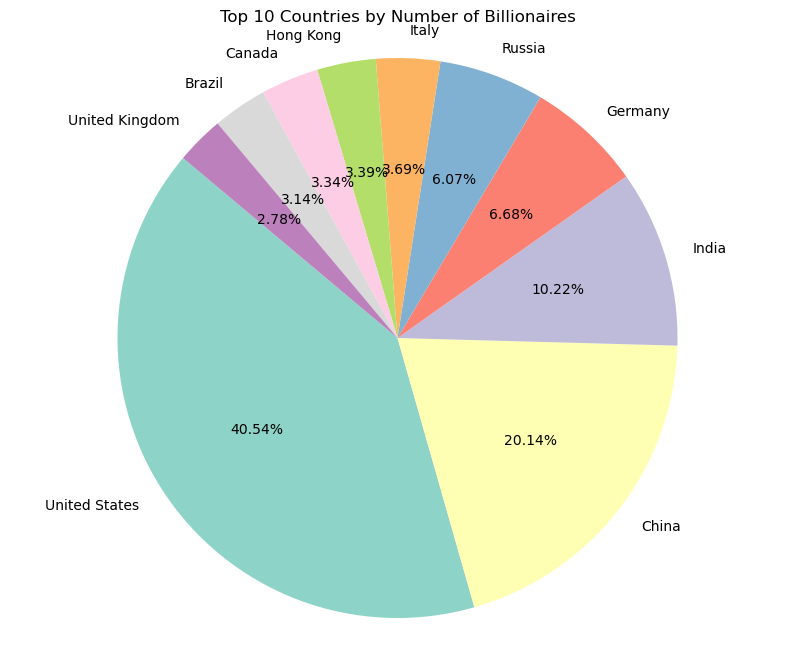

In [323]:
#распределения стран
country_distribution = df_g['COUNTRY'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(country_distribution, labels=country_distribution.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set3', n_colors=10))
plt.title('Top 10 Countries by Number of Billionaires')
plt.axis('equal')
plt.show()

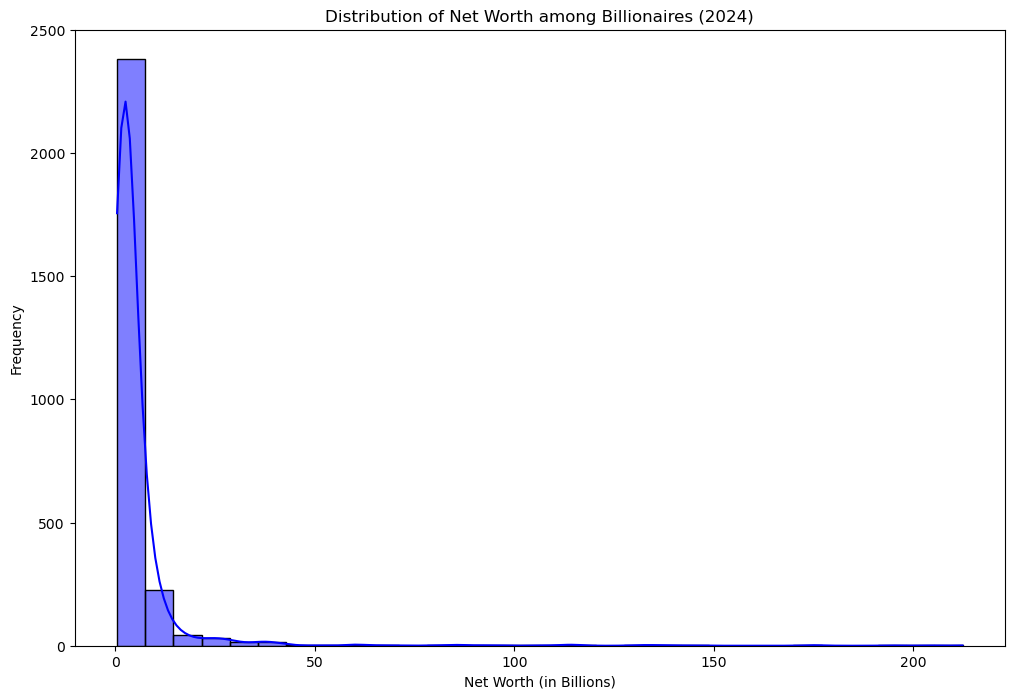

In [325]:
plt.figure(figsize=(12, 8))
sns.histplot(df['NET WORTH'], bins=30, kde=True, color='blue')
plt.title('Distribution of Net Worth among Billionaires (2024)')
plt.xlabel('Net Worth (in Billions)')
plt.ylabel('Frequency')
plt.show()

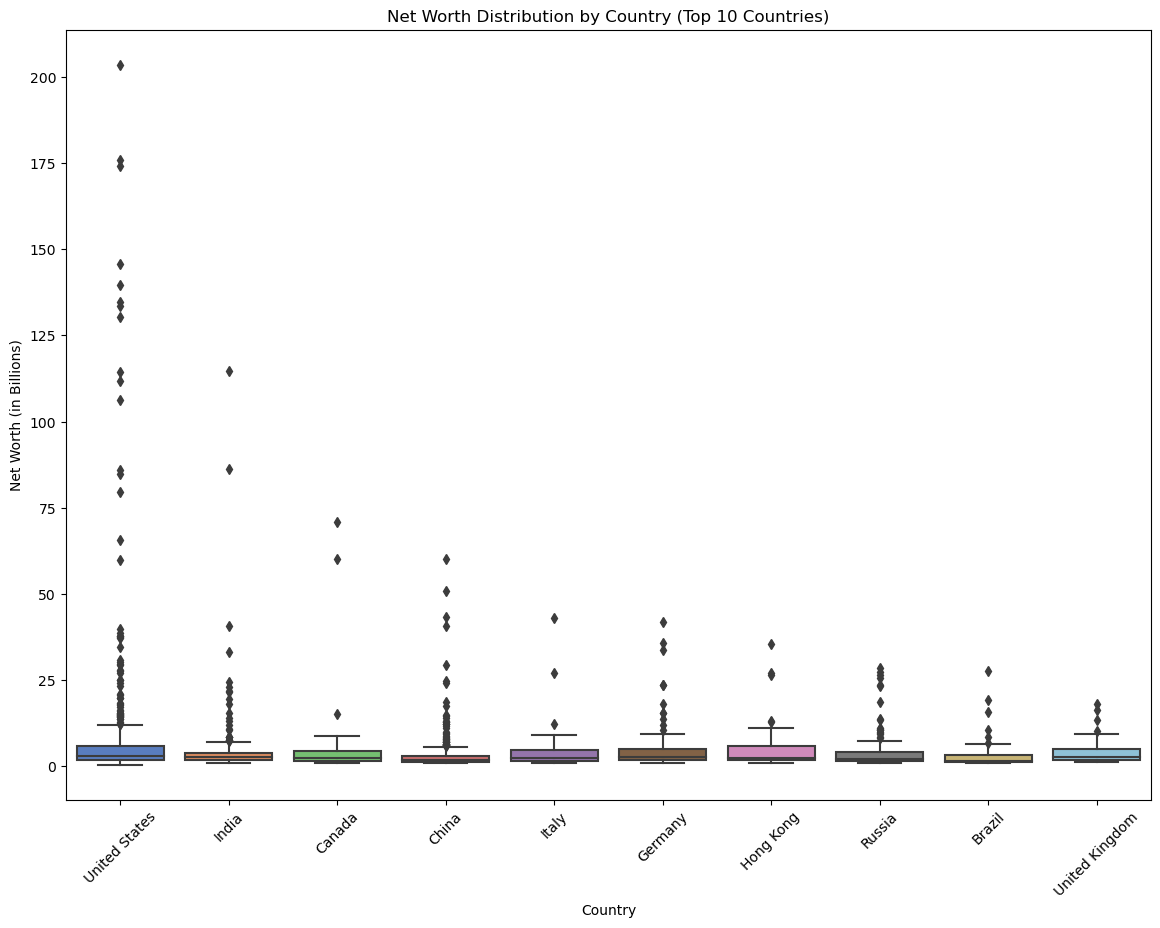

In [328]:
top_10_countries = df_g['COUNTRY'].value_counts().head(10).index
plt.figure(figsize=(14, 10))
sns.boxplot(x='COUNTRY', y='NET WORTH', data=df_g[df_g['COUNTRY'].isin(top_10_countries)], palette='muted')
plt.title('Net Worth Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Net Worth (in Billions)')
plt.xticks(rotation=45)
plt.show()

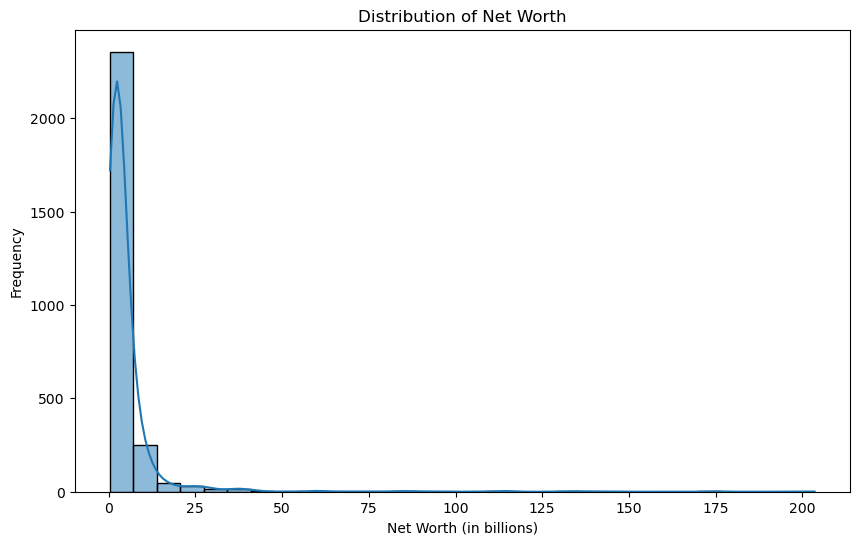

In [329]:
plt.figure(figsize=(10, 6))
sns.histplot(df_g['NET WORTH'], bins=30, kde=True)
plt.title('Distribution of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.show()

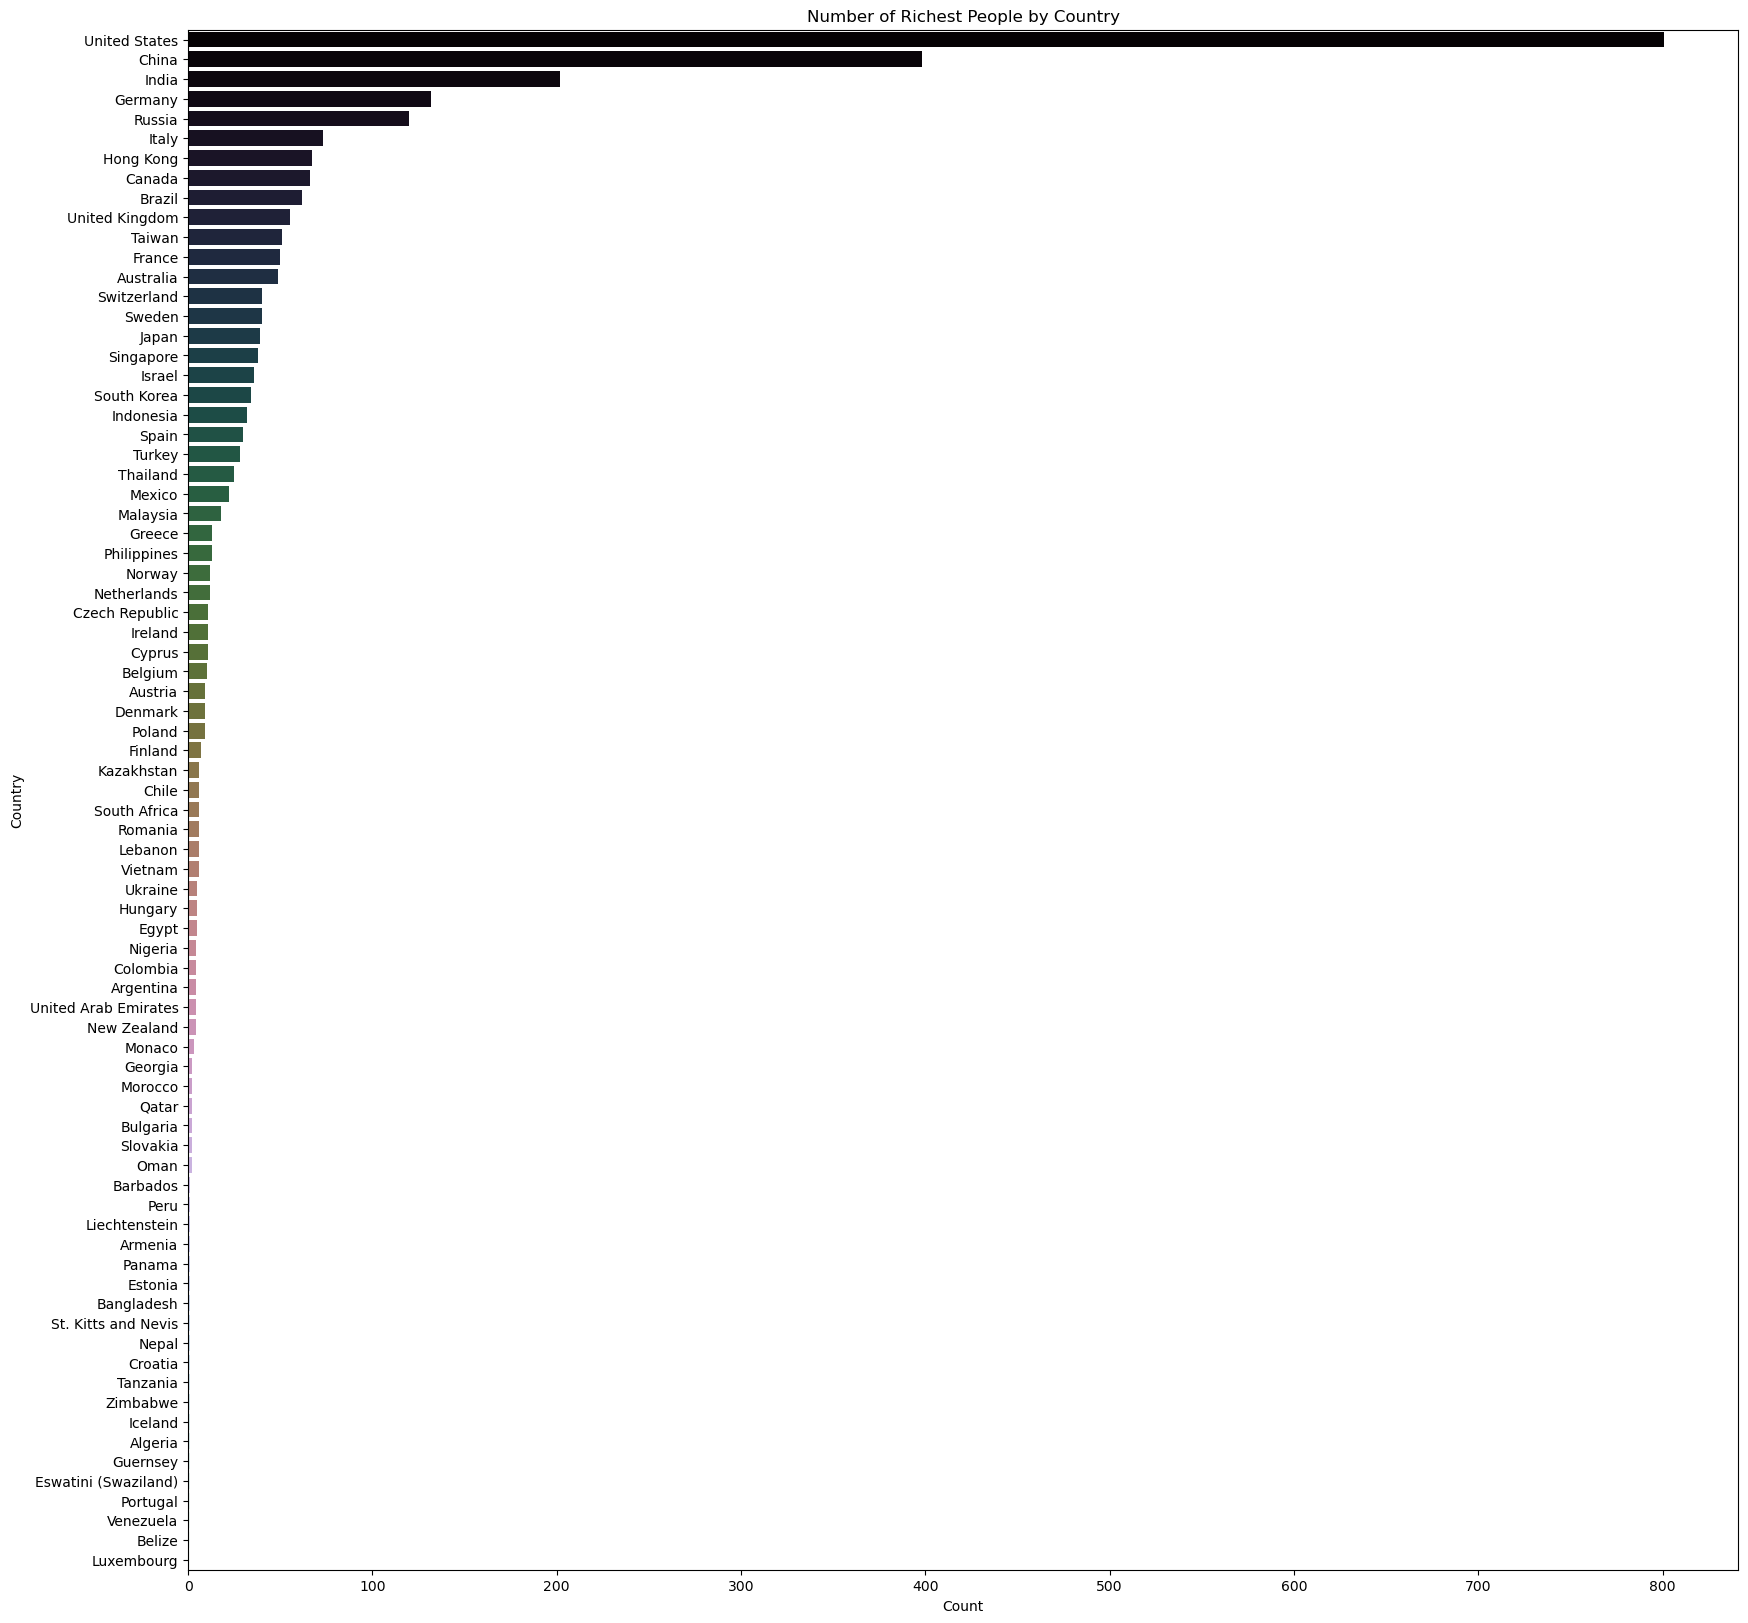

In [330]:
plt.figure(figsize=(20, 20))
sns.countplot(y='COUNTRY', data=df_g, order=df_g['COUNTRY'].value_counts().index, palette='cubehelix')
plt.title('Number of Richest People by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()